# Step 1: Data Collection and Preprocessing

In [1]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../input/solar-system-major-bodies-data/sol_data.csv')

In [3]:
df.shape

(265, 31)

In [4]:
print(df.head())

    eName  isPlanet  semimajorAxis  perihelion  aphelion  eccentricity  \
0    Moon     False         384400      363300    405500        0.0549   
1  Phobos     False           9376        9234      9518        0.0151   
2  Deimos     False          23458       23456     23471        0.0002   
3      Io     False         421800           0         0        0.0040   
4  Europa     False         671100           0         0        0.0090   

   inclination  density  gravity    escape  ...   orbits  bondAlbido  \
0        5.145    3.344   1.6200  2380.000  ...    Earth         NaN   
1        1.075    1.900   0.0057    11.390  ...     Mars         NaN   
2        1.075    1.750   0.0030     5.556  ...     Mars         NaN   
3        0.036    3.530   1.7900     0.000  ...  Jupiter         NaN   
4        0.466    3.010   1.3100     0.000  ...  Jupiter         NaN   

   geomAlbido  RV_abs  p_transit  transit_visibility  transit_depth  \
0         NaN     NaN   1.811589          326.08610

In [5]:
df.dtypes

eName                  object
isPlanet                 bool
semimajorAxis           int64
perihelion              int64
aphelion                int64
eccentricity          float64
inclination           float64
density               float64
gravity               float64
escape                float64
meanRadius            float64
equaRadius            float64
polarRadius           float64
flattening            float64
dimension              object
sideralOrbit          float64
sideralRotation       float64
discoveryDate          object
mass_kg               float64
volume                float64
orbit_type             object
orbits                 object
bondAlbido            float64
geomAlbido            float64
RV_abs                float64
p_transit             float64
transit_visibility    float64
transit_depth         float64
massj                 float64
semimajorAxis_AU      float64
grav_int              float64
dtype: object

In [6]:
df.describe()

,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,meanRadius,equaRadius,...,volume,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
count,2.650000e+02,2.650000e+02,2.650000e+02,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,...,1.700000e+01,8.000000,13.000000,13.000000,265.000000,265.000000,2.650000e+02,2.650000e+02,265.000000,2.650000e+02
mean,1.330740e+09,5.999915e+07,6.149610e+07,0.147217,64.372492,1.144789,1.383590,3004.399796,3481.592107,771.807006,...,8.308177e+16,0.354875,0.494615,1.230159,inf,inf,3.848783e-03,3.957635e+00,8.895450,inf
std,1.048573e+10,3.332062e+08,3.365186e+08,0.170820,74.546015,0.611739,16.934667,38164.427057,43141.006009,6139.791952,...,3.419392e+17,0.199307,0.258534,3.460159,NaN,NaN,6.142957e-02,6.433904e+01,70.092770,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.340000,0.000000,0.000000,0.300000,0.000000,...,5.783610e+03,0.088000,0.090000,0.000008,0.000005,0.000825,1.856083e-13,5.263158e-17,0.000000,1.379632e+08
25%,2.946720e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,2.700000,0.000000,...,4.210000e+09,0.280000,0.367000,0.000030,0.029102,5.238287,1.503427e-11,7.894737e-14,0.001970,2.238809e+13
50%,2.015529e+07,0.000000e+00,0.000000e+00,0.056500,5.145000,1.000000,0.000000,0.000000,27.000000,0.000000,...,6.083000e+10,0.303000,0.499000,0.007939,0.034549,6.218797,1.503427e-09,1.263158e-11,0.134730,5.729347e+15
75%,2.392800e+07,0.000000e+00,0.000000e+00,0.259000,150.700000,1.000000,0.000000,0.000000,33.000000,0.000000,...,6.250000e+13,0.382250,0.660000,0.278582,2.366726,426.010751,2.245860e-09,4.842105e-11,0.159949,9.156858e+20
max,1.520000e+11,2.147484e+09,2.147484e+09,0.751200,179.800000,5.513600,274.000000,617000.000000,696342.000000,71492.000000,...,1.410000e+18,0.760000,0.960000,12.473518,inf,inf,1.000000e+00,1.047368e+03,1016.057243,inf


In [8]:
# drop irrelevant columns
df.drop(["eName", "orbits", "bondAlbido", "geomAlbido", "RV_abs",
         "dimension", "discoveryDate", "orbit_type", "transit_visibility",
         "grav_int", "p_transit"], 
        axis=1, inplace=True)

In [9]:
# check for missing values
df.isnull().any()

isPlanet            False
semimajorAxis       False
perihelion          False
aphelion            False
eccentricity        False
inclination         False
density             False
gravity             False
escape              False
meanRadius          False
equaRadius          False
polarRadius         False
flattening          False
sideralOrbit        False
sideralRotation     False
mass_kg             False
volume               True
transit_depth       False
massj               False
semimajorAxis_AU    False
dtype: bool

In [10]:
# fill missing values
df = df.fillna(0)

In [11]:
# Convert boolean column 'isPlanet' to numeric (True: 1, False: 0)
df["isPlanet"] = df["isPlanet"].astype(int)

# Step 2: Data Visualization

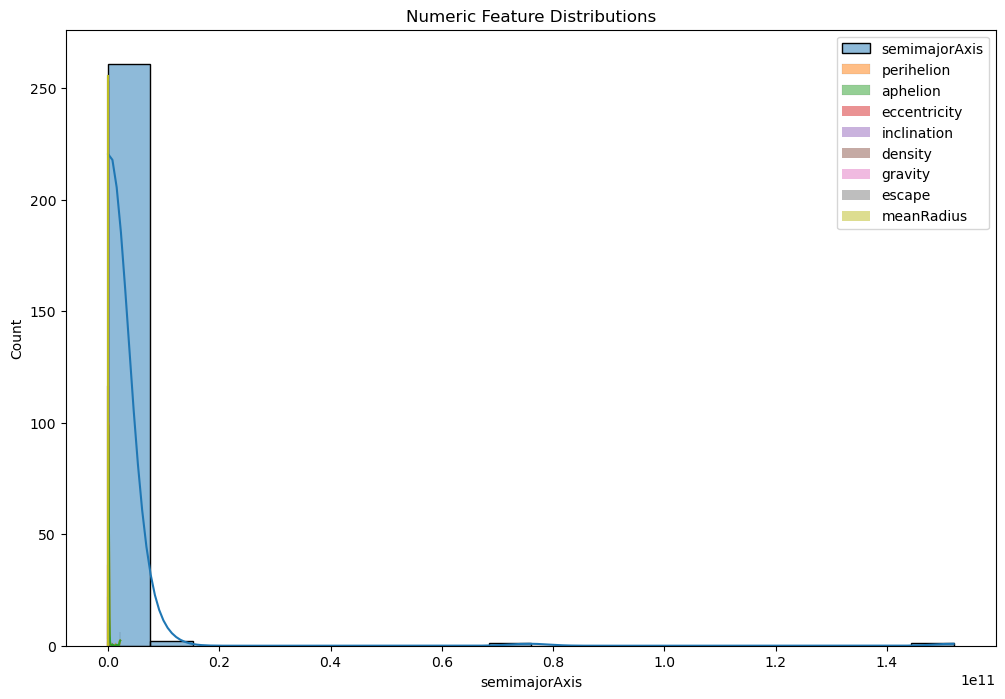

In [12]:
# Plot histograms for numeric features
numeric_features = ["semimajorAxis", "perihelion", "aphelion", "eccentricity", "inclination", "density", "gravity", "escape", "meanRadius"]
plt.figure(figsize=(12, 8))
for feature in numeric_features:
    sns.histplot(df[feature], bins=20, kde=True, label=feature)
plt.legend()
plt.title("Numeric Feature Distributions")
plt.show()

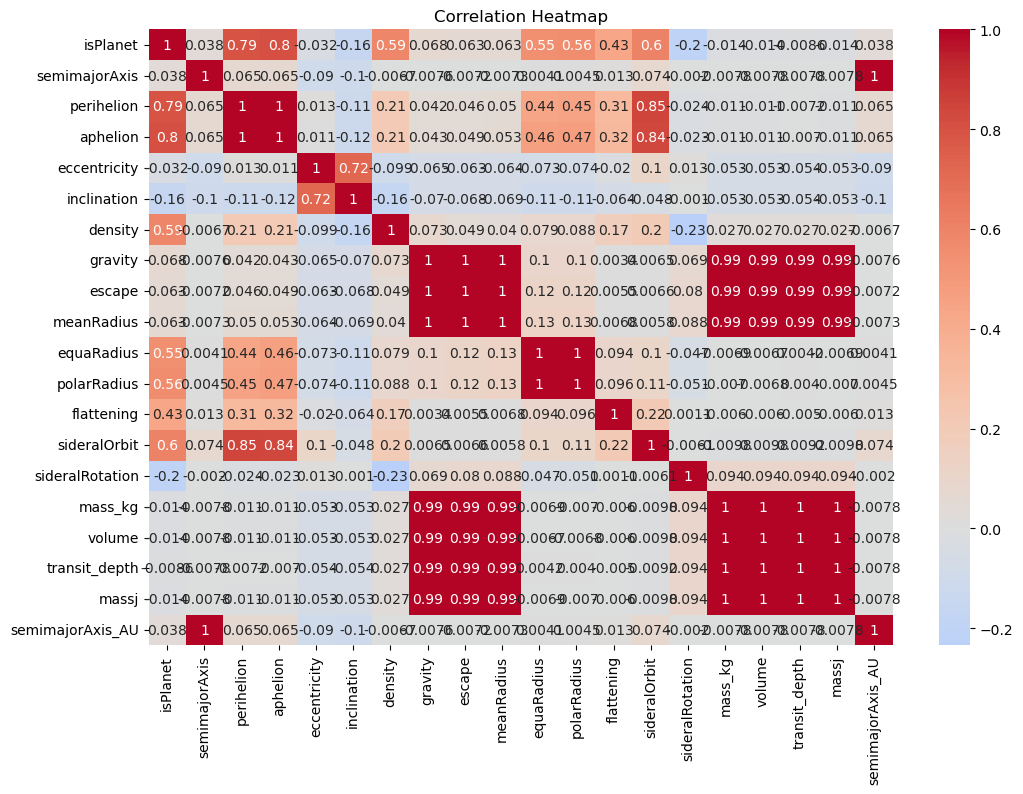

In [13]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

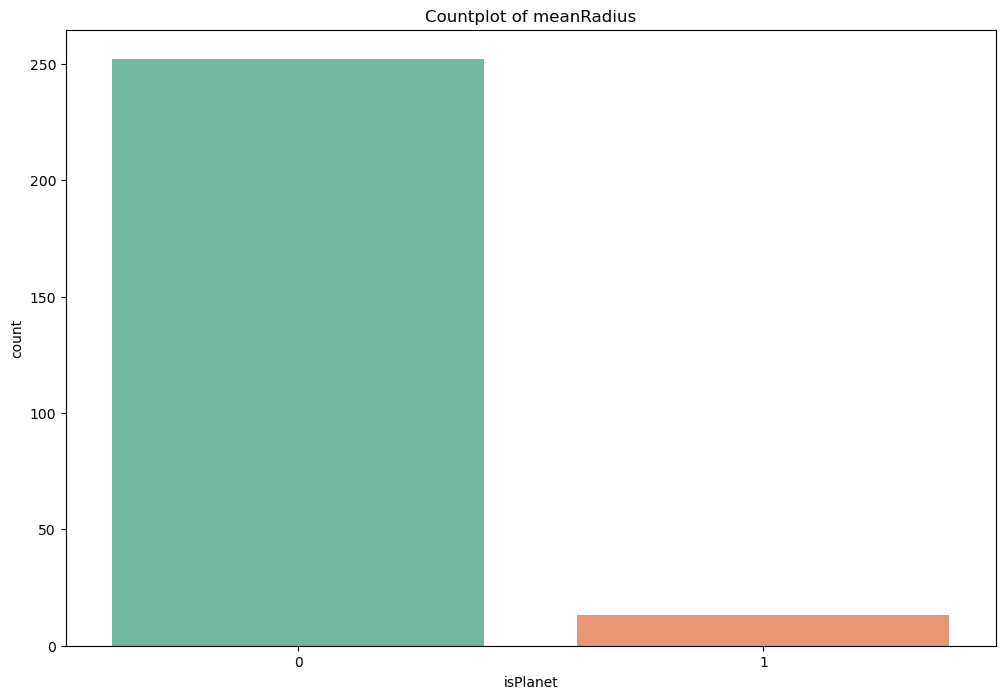

In [14]:
# Plot countplots for isPlanet
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='isPlanet', palette="Set2")
plt.title(f"Countplot of {feature}")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


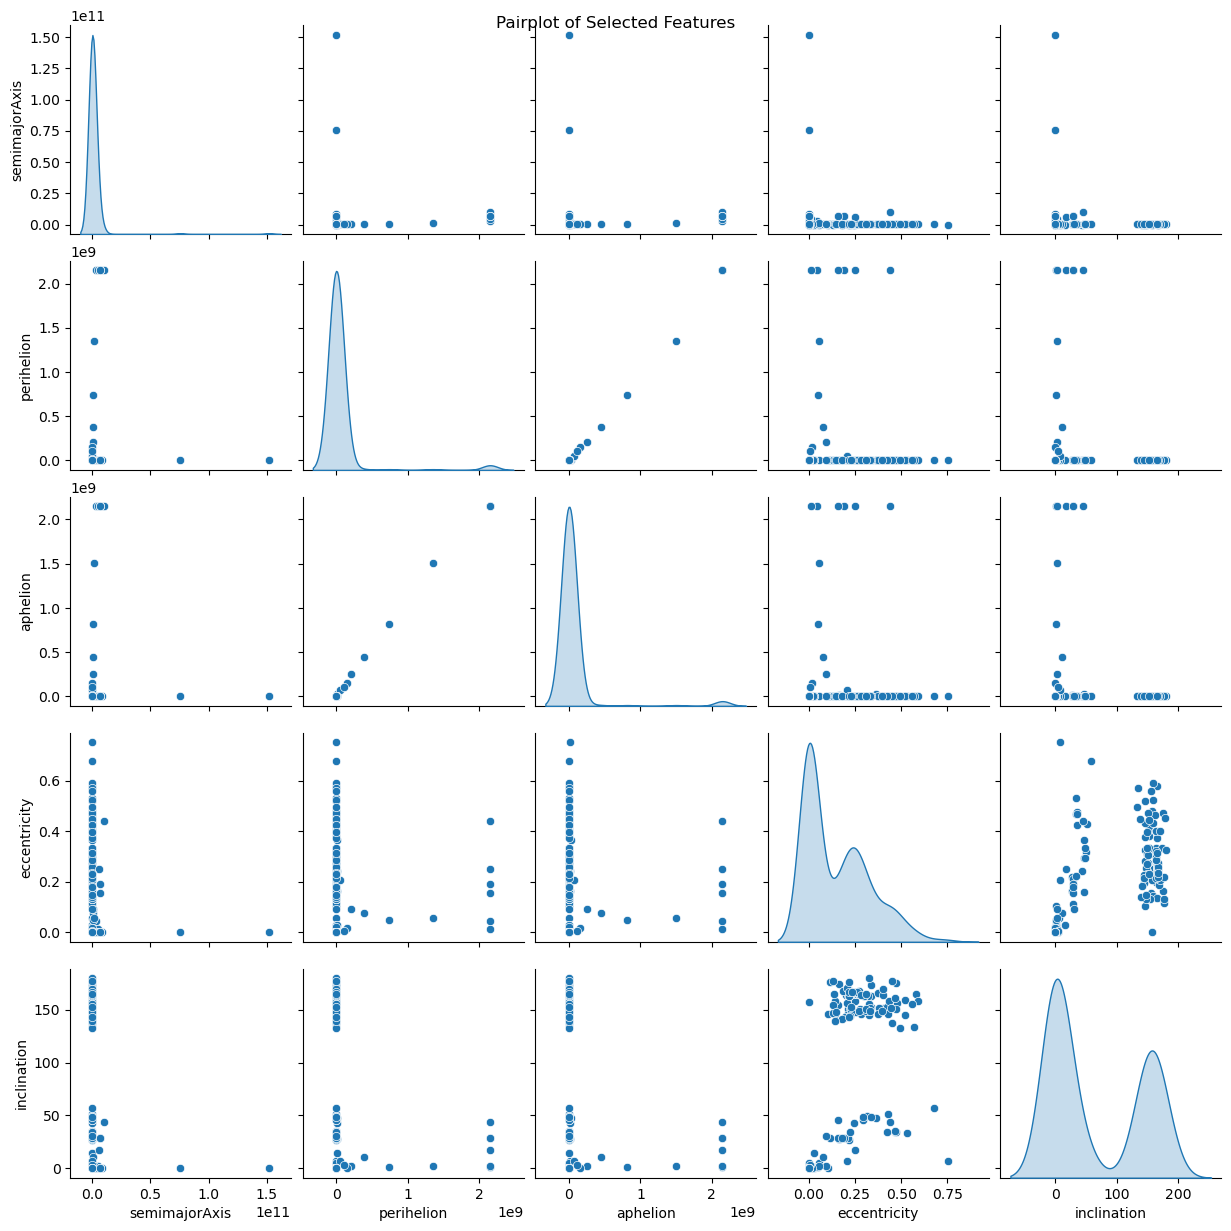

In [15]:
# Select a subset of features for pairplot
selected_features = ["semimajorAxis", "perihelion", "aphelion", "eccentricity", "inclination"]

# Create a pairplot
sns.pairplot(df[selected_features], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


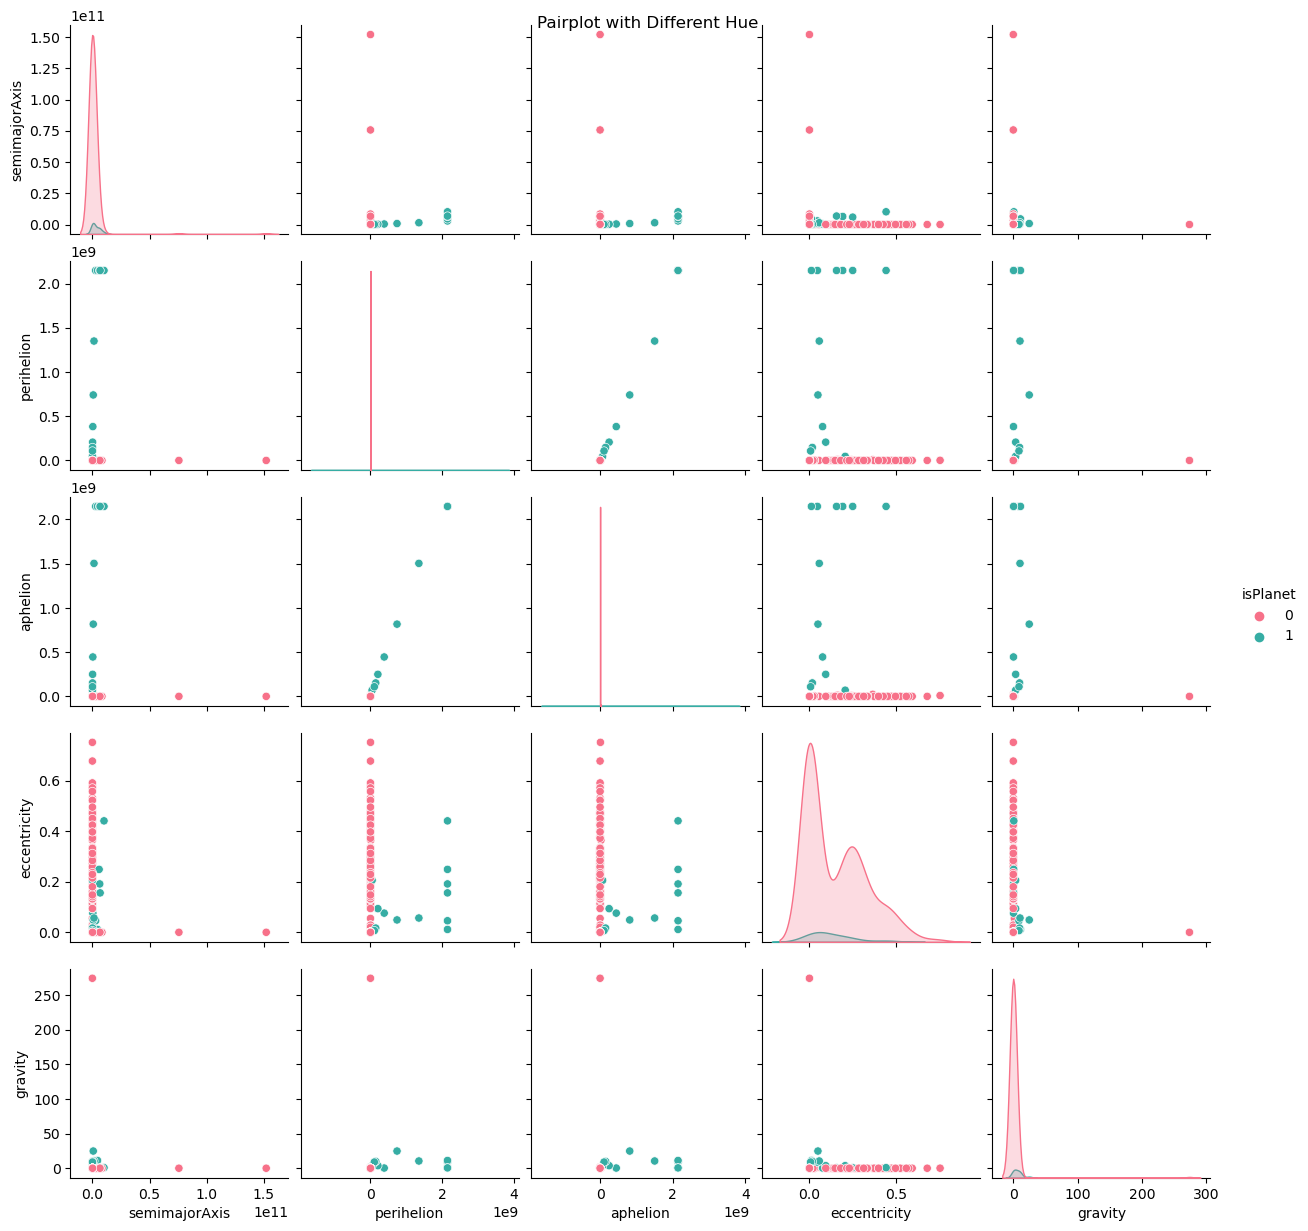

In [16]:
# Pairplot wih different hue
# Select features and add hue based on the 'isPlanet' column
pairplot_data = df[["semimajorAxis", "perihelion", "aphelion", "eccentricity", "gravity", "isPlanet"]]
sns.pairplot(pairplot_data, hue="isPlanet", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot with Different Hue")
plt.show()

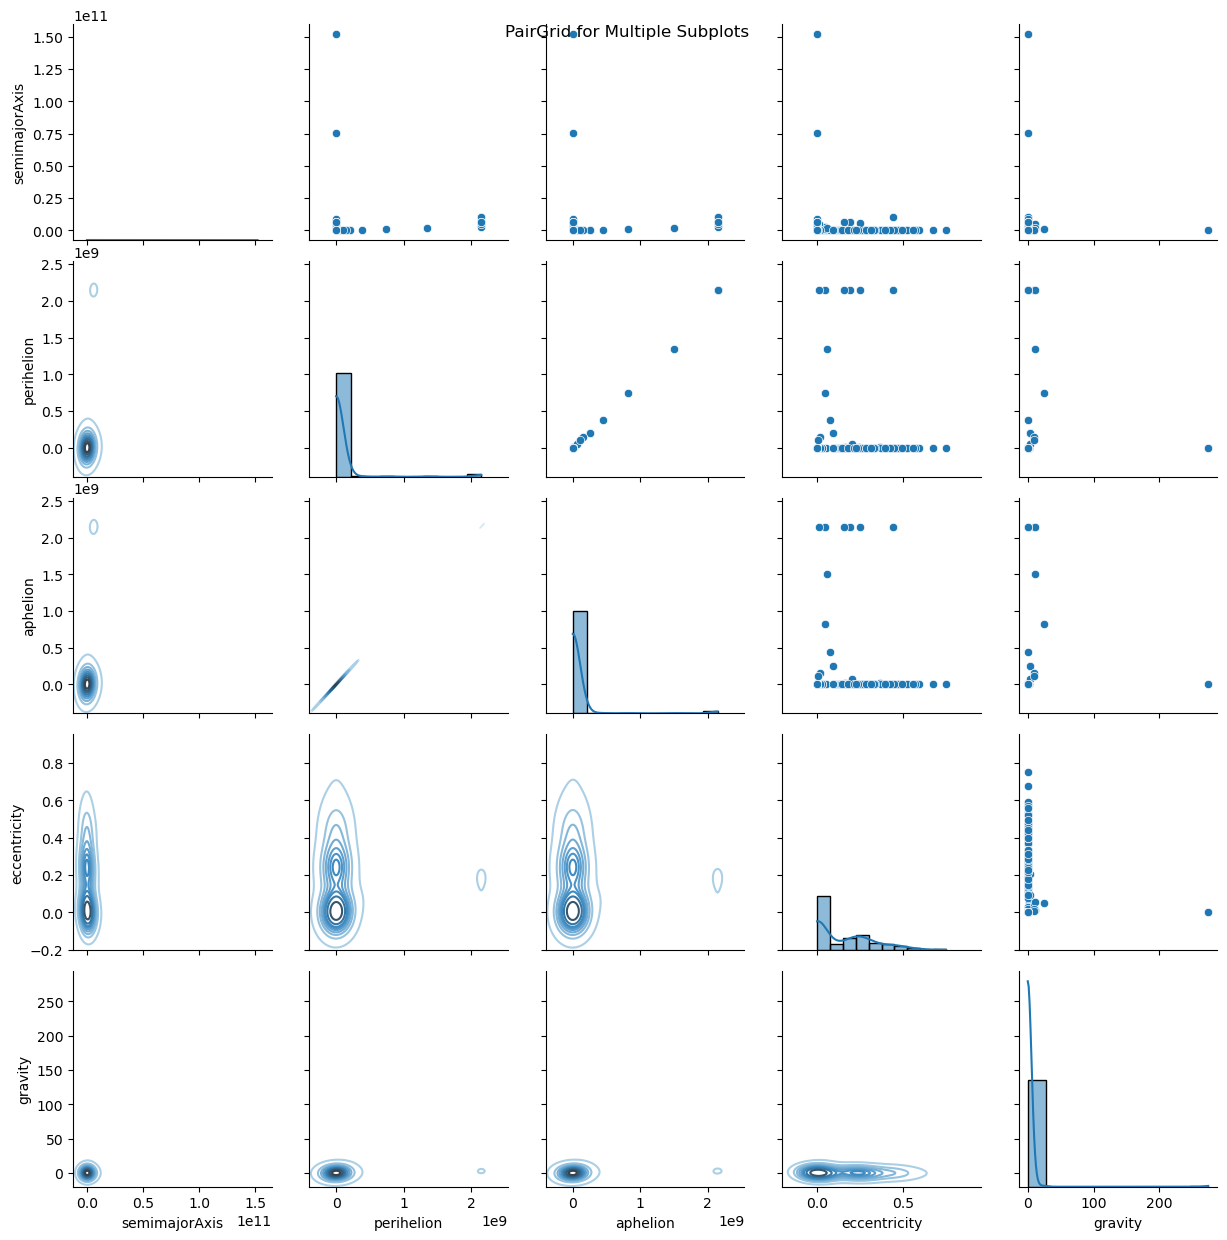

In [17]:
# Select a subset of features for PairGrid
pairgrid_features = ["semimajorAxis", "perihelion", "aphelion", "eccentricity", "gravity"]

# Create a PairGrid for multiple subplots
g = sns.PairGrid(df[pairgrid_features])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, cmap="Blues_d")
plt.suptitle("PairGrid for Multiple Subplots")
plt.show()

# Step 3: Split Data and Feature Engineering

In [18]:
# Split data into features (X) and target (y)
X = df.drop("isPlanet", axis=1)
y = df["isPlanet"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.2, random_state=42)


In [19]:
# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build and Train Model

In [21]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Step 5: Make Predictions and Evaluate Model Performance

In [22]:
# Predict the target values for the scaled test data
y_pred = model.predict(X_test_scaled)

In [23]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9622641509433962


# Conclusion

Based on model accuracy we can see that our model performed very well.

However, this project is meant to be a simple classification task using a Logistic Regression model. That is why it doesn't go into details for steps such as cross-validation, hyperparameter tuning, and feature engineering.